In [3]:
!unzip "/content/Car-Bike-Dataset.zip" -d "/content"

Archive:  /content/Car-Bike-Dataset.zip
   creating: /content/Car-Bike-Dataset/
   creating: /content/Car-Bike-Dataset/Sample_prediction/
  inflating: /content/Car-Bike-Dataset/Sample_prediction/Bike (205).jpeg  
  inflating: /content/Car-Bike-Dataset/Sample_prediction/Car (339).jpeg  
  inflating: /content/Car-Bike-Dataset/Sample_prediction/images (1).jpeg  
  inflating: /content/Car-Bike-Dataset/Sample_prediction/images (2).jpeg  
  inflating: /content/Car-Bike-Dataset/Sample_prediction/images.jpeg  
  inflating: /content/Car-Bike-Dataset/Sample_prediction/istockphoto-1019946502-612x612.jpg  
   creating: /content/Car-Bike-Dataset/Test_set/
   creating: /content/Car-Bike-Dataset/Test_set/bike/
  inflating: /content/Car-Bike-Dataset/Test_set/bike/Bike (1).jpeg  
  inflating: /content/Car-Bike-Dataset/Test_set/bike/Bike (1).jpg  
  inflating: /content/Car-Bike-Dataset/Test_set/bike/Bike (1).png  
  inflating: /content/Car-Bike-Dataset/Test_set/bike/Bike (10).jpeg  
  inflating: /conten

In [5]:
import tensorflow

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255, #rescaling the image
                                   shear_range=0.2, #shearing the image like tilting the image
                                   zoom_range=0.2 #zooming the image
                                   )

In [8]:
train_set = train_datagen.flow_from_directory("/content/Car-Bike-Dataset/Training_set",
                                              target_size=(128,128),
                                              batch_size=32,
                                              class_mode="binary")

Found 3190 images belonging to 2 classes.


In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory("/content/Car-Bike-Dataset/Test_set",
                                            target_size=(128,128),
                                            batch_size=32,
                                            class_mode="binary")

Found 799 images belonging to 2 classes.


In [10]:
from tensorflow.keras.models import Sequential

In [11]:
model = Sequential()

In [12]:
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Flatten

In [13]:
# 1st convolutional layers --> 32 filters --> 3*3 matrix (kernal size)  ----> Feature extraction(MAP)
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(128,128,3),activation="relu"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
#1stpooling layer --> 2*2 matrix (pool size)
model.add(MaxPooling2D(pool_size=(2,2)))

In [15]:
#2nd convolutional layers --> 32 filters --> 3*3 matrix (kernal size)  ----->Feature extraction(MAP)
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(128,128,3),activation="relu"))

In [16]:
#2nd pooling layer --> 2*2 matrix (pool size)
model.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
#converting image into 1d
model.add(Flatten())
#fully connected hidden layer
model.add(Dense(units=128,activation="relu"))
#output layer
model.add(Dense(units=1,activation="sigmoid"))
#compiling the model
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
#Traing the model
model.fit(x=train_set,validation_data=test_set,epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.5996 - loss: 0.7522

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 216ms/step - accuracy: 0.6006 - loss: 0.7507 - val_accuracy: 0.7972 - val_loss: 0.4065
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 169ms/step - accuracy: 0.8709 - loss: 0.3358 - val_accuracy: 0.8849 - val_loss: 0.2708
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 168ms/step - accuracy: 0.9057 - loss: 0.2401 - val_accuracy: 0.9287 - val_loss: 0.1936
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 177ms/step - accuracy: 0.9115 - loss: 0.2154 - val_accuracy: 0.8348 - val_loss: 0.4440
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 170ms/step - accuracy: 0.9242 - loss: 0.1825 - val_accuracy: 0.9249 - val_loss: 0.2124
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 177ms/step - accuracy: 0.9396 - loss: 0.1564 - val_accuracy: 0.8248 - val_loss: 0.4926
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 168ms/step - accuracy: 0.9379 - loss: 0.1505 - val_accuracy: 0.8648 - val_loss: 0.4539
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 165ms/step - accuracy: 0.9581 - loss: 0.1071 - val

In [21]:
# testing the image
from tensorflow.keras.preprocessing.image import load_img,img_to_array
test_image = load_img("/content/Car-Bike-Dataset/Sample_prediction/Bike (205).jpeg",target_size=(128,128))

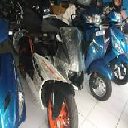

In [22]:
test_image

In [23]:
test_image_array = img_to_array(test_image)

In [24]:
image_reshape = test_image_array.reshape(1,128,128,3)

In [25]:
result = model.predict(image_reshape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step


In [26]:
result

array([[0.]], dtype=float32)

In [27]:
train_set.class_indices

{'bike': 0, 'car': 1}

In [28]:
if result[0][0] == 0:
  print('Bike')
else:
  print("Car")

Bike
